In [10]:
import numpy as np
import pandas as pd
from SALib.sample import saltelli
from SALib.analyze import sobol

import matplotlib.pyplot as plt
import seaborn as sns

## Simulation

In [11]:
problem = {
    'num_vars': 8,
    'names': ['server refresh cycle','server utilization level','inactive server percentage','server efficiency quantile','climate zone','infrastructure efficiency quantile', 'cooling system type', 'water consumption factor'],
    'bounds': [[1,8],[0.1,0.8],[0.05,0.3],[-1,1],[0,19],[-1,1],[0,10],[0,12]],
    'dists': ['unif', 'unif', 'unif', 'unif', 'unif', 'unif', 'unif', 'unif']
}

In [12]:
sample_size = 2**10 * 2
sobol_values = saltelli.sample(problem, sample_size)

/var/folders/m8/lhvjr3855dq5057zbh86dzz80000gn/T/ipykernel_16029/2334762142.py:2: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  sobol_values = saltelli.sample(problem, sample_size)


In [13]:
df = pd.DataFrame(data = sobol_values, columns = problem['names'])
# df.to_csv("data/sobol_0924.csv") # Save to R for Simulation

In [14]:
df_res = pd.read_csv("data/sobol_res_0924.csv") # Load back the Result for SA
Y_sobol = np.array(df_res['WF']).reshape(sobol_values.shape[0])

In [15]:
Si = sobol.analyze(problem, Y_sobol, num_resamples=20,print_to_console=False)

In [16]:
scenario1 = {'Variables':[v for v in problem['names']], 'Indices': [v for v in Si['ST']], 'conf': [v for v in Si['ST_conf']]}
scenario1 = pd.DataFrame(scenario1).sort_values(by=['Indices'], ascending=False)
scenario1['scenario'] = 1
# scenario1.to_csv("data/SA_result_0924.csv")

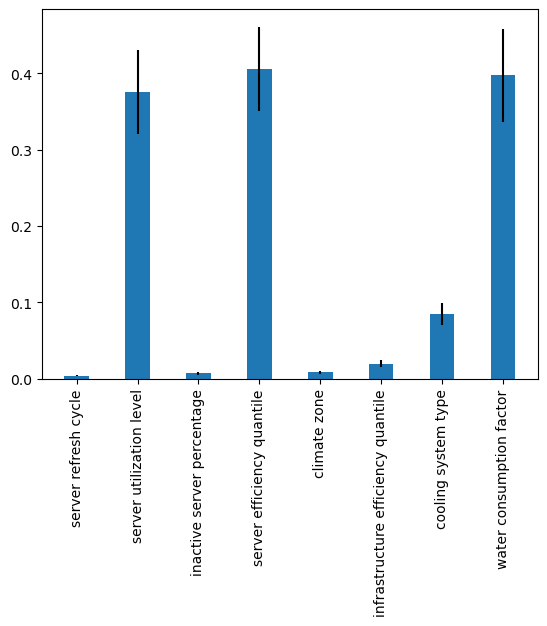

In [17]:
plt.bar(range(len(Si['ST'])), Si['ST'], width= 0.4, yerr = Si['ST_conf'])
plt.xticks(range(len(Si['ST'])),problem['names'], rotation=90)
plt.show()

## Results

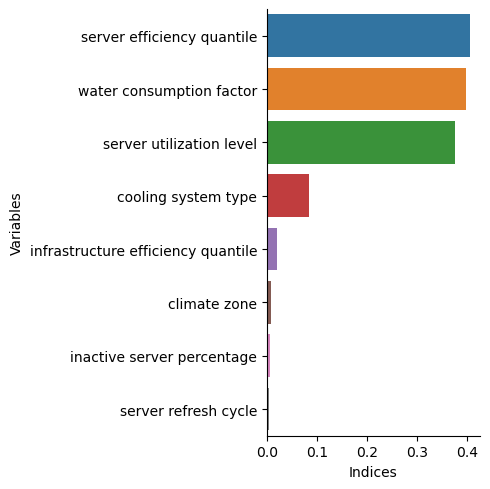

In [18]:
sns.catplot(data=scenario1, x = 'Indices', y = 'Variables',kind = 'bar', orient = "h")
plt.show()
